In [1]:
from DataLoader import *
from Model import *
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
import itertools

## Prepare data for training
with class loader, we can store raw data and prepared data in one place.
We can also call functions to show data sample or info

In [2]:
loader = Loader("data/data_kosice.csv")
# cleans data
loader.clean_data()
# standardize numeric attributes and uses encoder for categorial attributes
loader.prepare_data()

X_train, X_test, y_train, y_test = loader.split_data()
show_sample(X_train, sample=10)

,housing_category_1 izbový byt,housing_category_2 izbový byt,housing_category_3 izbový byt,housing_category_4 izbový byt,housing_category_5 a viac izbový byt,housing_category_Apartmán,housing_category_Garsónka,housing_category_Mezonet,city_area_Košice,city_area_Košice I - Kavečany,city_area_Košice I - Sever,city_area_Košice I - Staré Mesto,city_area_Košice I - Ťahanovce,city_area_Košice II - Lorinčík,city_area_Košice II - Sídlisko KVP,city_area_Košice II - Západ,city_area_Košice II - Šaca,city_area_Košice III - Dargovských Hrdinov,city_area_Košice III - Košická Nová Ves,city_area_Košice IV - Juh,city_area_Košice IV - Krásna,city_area_Košice IV - Nad jazerom,city_area_Košice IV - Vyšné Opátske,housing_state_Developerský projekt,housing_state_Kompletná rekonštrukcia,housing_state_Novostavba,housing_state_Pôvodný stav,housing_state_Vo výstavbe,housing_state_Čiastočná rekonštrukcia,living_area,land_area
173,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.297778,-1.0
934,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.546667,-1.0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.368889,-1.0
905,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.431111,-1.0
871,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-0.422222,-1.0
233,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.288889,-1.0
366,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.288889,-1.0
301,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-0.075556,-1.0
950,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.651556,-1.0
750,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.422222,-1.0


## Deep learning approach
we try different hyperparameters for our model and then save only the best of all models

In [3]:
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
num_layers = [1, 2, 3]
dropouts = [True, False]

best_model = None
best_loss = float('inf')
best_hyperparameters = {
  "learning_rate": 0,
  "batch_size": 0,
  "num_layers": 0,
  "dropout": True
}
best_history = None

hyperparameter_combinations = list(itertools.product(learning_rates, batch_sizes, num_layers, dropouts))


for i, (lr, bs, nl, do) in enumerate(hyperparameter_combinations):
    print(f"Training model {i+1}/{len(hyperparameter_combinations)} with lr={lr}, bs={bs}, nl={nl}, do={do}...")

    # build adn compile the model
    model = build_nn_model(input_dim=len(X_train.columns), depth=nl, dropout=do, show_summary=False)
    model.compile(loss='mse', optimizer=Adam(learning_rate=lr), metrics=['mse'])
    
    # train the model
    # checkpoint = ModelCheckpoint(f"MLmodel/model/nn_lr={lr}_bs={bs}_nl={nl}_do={do}.model", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min')
    history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=bs, verbose=0)
    
    # evaluate the model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test loss: {test_loss}")

    # save best model and its hyperparameters, loss, and history
    if test_loss < best_loss:
        best_hyperparameters["learning_rate"] = lr
        best_hyperparameters["batch_size"] = bs
        best_hyperparameters["num_layers"] = nl
        best_hyperparameters["dropout"] = do
        best_loss = test_loss
        best_model = model
        best_model.save("MLmodel/model/model_nn.model")
        best_history = history

Training model 1/54 with lr=0.001, bs=16, nl=1, do=True...


2023-05-01 17:01:50.976585: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Test loss: 0.0048713418655097485
INFO:tensorflow:Assets written to: MLmodel/model/model_nn.model/assets
Training model 2/54 with lr=0.001, bs=16, nl=1, do=False...
Test loss: 0.005197869148105383
Training model 3/54 with lr=0.001, bs=16, nl=2, do=True...
Test loss: 0.005253283306956291
Training model 4/54 with lr=0.001, bs=16, nl=2, do=False...
Test loss: 0.00565807381644845
Training model 5/54 with lr=0.001, bs=16, nl=3, do=True...
Test loss: 0.004898665472865105
Training model 6/54 with lr=0.001, bs=16, nl=3, do=False...
Test loss: 0.004852831829339266
INFO:tensorflow:Assets written to: MLmodel/model/model_nn.model/assets
Training model 7/54 with lr=0.001, bs=32, nl=1, do=True...
Test loss: 0.006220420356839895
Training model 8/54 with lr=0.001, bs=32, nl=1, do=False...
Test loss: 0.005736005958169699
Training model 9/54 with lr=0.001, bs=32, nl=2, do=True...
Test loss: 0.005558329168707132
Training model 10/54 with lr=0.001, bs=32, nl=2, do=False...
Test loss: 0.004833959508687258
I

In [4]:
print(f"""Best hyperparameters are:
      learning rate = {best_hyperparameters["learning_rate"]}
      batch size = {best_hyperparameters["batch_size"]}
      number of layers = {best_hyperparameters["num_layers"]}
      dropout = {best_hyperparameters["dropout"]}""")


test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}")

Best hyperparameters are:
      learning rate = 0.01
      batch size = 16
      number of layers = 2
      dropout = False
Test loss: 0.004086941480636597


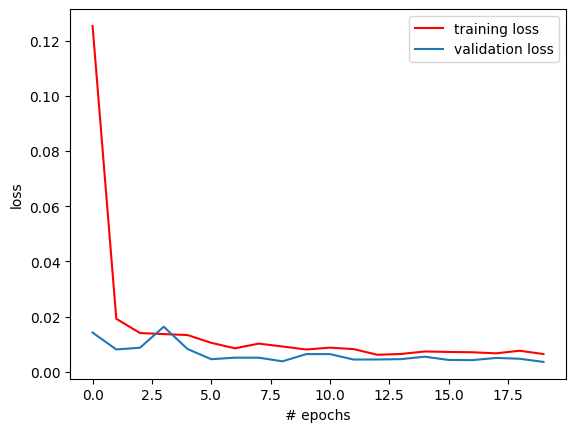

In [5]:
plt.plot(best_history.history['loss'],'r',label='training loss')
plt.plot(best_history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()